In [1]:
import functions as utils
from classes import Two_SLS
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import t

(0.9801778504247862, 1.0524859327788316)


### 4. Weak Instruments


##### 4.2.b 

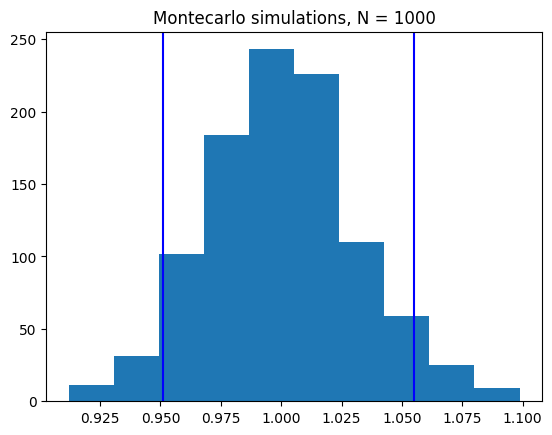

2SLS 95% CI: 
 (1.0268742942439664, 1.104714997373248)

Monte Carlo 95% CI: 
 (0.9511647003368375, 1.0548920972834315)


In [2]:
n = 1000
β = 1 
π = 1

b = np.empty(0)
se = np.empty(0)
for i in range(1000):
    x, y, Z = utils.dgp(n, β, π)
    model = Two_SLS(y, x, Z)
    b = np.append(b, model.beta_tsls)
    se = np.append(se, model.se())

monte_carlo_5 = np.percentile(b, 5)
monte_carlo_95 = np.percentile(b, 95)

fig, ax = plt.subplots(1, 1)
ax.hist(b)
ax.set_title(f"Montecarlo simulations, N = {n}")
ax.axvline(x = monte_carlo_5, color = 'b')
ax.axvline(x = monte_carlo_95, color = 'b')
ax.set_title(f"Montecarlo simulations, N = {n}")
plt.show()

x, y, Z = utils.dgp(n, β, π)
model = Two_SLS(y, x, Z)

print(f"2SLS 95% CI: \n {model.ci(0.95)}\n")
print(f"Monte Carlo 95% CI: \n {(monte_carlo_5, monte_carlo_95)}")


- Note: I'm not commenting on the "bias, precision" of the estimator or the "size and power of ttest"
COME BACK

##### 4.2.c

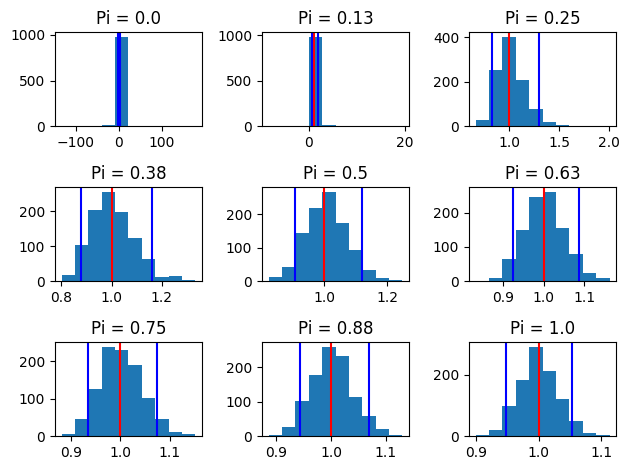

In [5]:
n = 1000
pi = np.linspace(0.001,1,9)
fig, ax = plt.subplots(3,3)
ax = ax.reshape(-1)
for i, coef in enumerate(pi): 
    b = np.empty(0)
    se = np.empty(0)
    for j in range(1000):
        x, y, Z = utils.dgp(n, β, coef)
        model = Two_SLS(y, x, Z)
        b = np.append(b, model.beta_tsls)
    
    monte_carlo_5 = np.percentile(b, 5)
    monte_carlo_95 = np.percentile(b, 95)

    ax[i].hist(b)
    ax[i].set_title(f"Pi = {np.round(coef, 2)}")
    ax[i].axvline(x=1, color='r', label='True beta')
    ax[i].axvline(x = monte_carlo_5, color = 'b')
    ax[i].axvline(x = monte_carlo_95, color = 'b')
fig.tight_layout()

##### 4.3.a

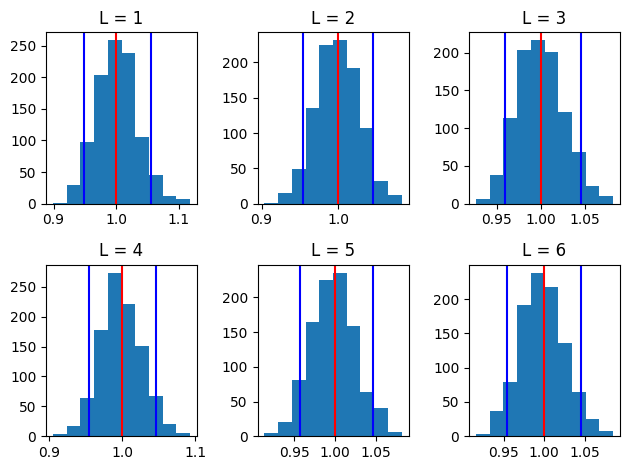

In [6]:
n = 1000
β = 1
b = np.empty(0)
V = np.empty(0)
N = 6
L = range(1, N+1)

fig, ax = plt.subplots(2, 3)
ax = ax.reshape(-1)
for l in L: 
    i = l-1
    b = np.empty(0)
    pi = np.array([(.5)**(x) for x in range(l)])

    for j in range(1000):
        x, y, Z = utils.dgp(n, β, pi)
        model = Two_SLS(y, x, Z)
        b = np.append(b, model.beta_tsls)

    monte_carlo_5 = np.percentile(b, 5)
    monte_carlo_95 = np.percentile(b, 95)

    ax[i].hist(b)
    ax[i].set_title(f"L = {l}")
    ax[i].axvline(x=1, color='r', label='True beta')
    ax[i].axvline(x = monte_carlo_5, color = 'b')
    ax[i].axvline(x = monte_carlo_95, color = 'b')
    fig.tight_layout()